In [1]:
cd /home/dongdong/SCR/trpcage.run05

/scratch/gpfs/dongdong/trpcage.run05


In [8]:
#!/usr/bin/env python3

import os,glob,shutil
import argparse
import numpy as np
import sklearn.cluster as cluster

cv_dih_dim = 38

def parse_cmd () :
    parser = argparse.ArgumentParser()
    parser.add_argument("-i","--idx-file", type=str, default = 'sel.out',
                        help="The sel idx files")
    parser.add_argument("-c","--cv-file", type=str, default = 'sel.angle.out',
                        help="The sel cv files")
    parser.add_argument("-t","--threshold", type=int, default = 0.3,
                        help="The number of clusters")
    parser.add_argument("--output-idx", type=str, default = 'cls.out',
                        help="The output cv idx")
    parser.add_argument("--output-cv", type=str, default = 'cls.angle.out',
                        help="The output cv value")
    args = parser.parse_args()
    return args

def cv_dist (a, b) :
    diff = a - b
    angle_pbc_range = len(diff)
    if cv_dih_dim is not None :
        angle_pbc_range = cv_dih_dim
    for ii in range(len(diff)) :
        value = diff[ii]
        if ii < angle_pbc_range :
            if value < -np.pi :
                value += 2 * np.pi
            elif value >= np.pi :
                value -= 2 * np.pi
        diff[ii] = value
    return np.linalg.norm(diff)

def mk_dist (cv) :
    nframe = cv.shape[0]
    dist = np.zeros([nframe, nframe])
    for ii in range(nframe) :
        for jj in range(ii+1, nframe) :
            dist[ii][jj] = cv_dist(cv[ii], cv[jj])
            dist[jj][ii] = dist[ii][jj]
    return dist

def mk_cluster (dist, distance_threshold) :
    cls = cluster.AgglomerativeClustering(n_clusters = None, 
                                          linkage='average', 
                                          affinity = 'precomputed',
                                          distance_threshold=distance_threshold)
    cls.fit(dist)
    return cls.labels_

def sel_from_cluster (angles, distance_threshold) :
    dist = mk_dist (angles)
    labels = mk_cluster (dist, distance_threshold)
    # make cluster map
    cls_map = []
    for ii in range(len(set(labels))) :
        cls_map.append([])
    for ii in range(len(labels)) :
        cls_idx = labels[ii]
        cls_map[cls_idx].append(ii)
    # randomly select from cluster
    cls_sel = []
    np.random.seed(seed = None)
    for ii in cls_map :
        _ret = np.random.choice(ii, 1)
        cls_sel.append (_ret[0])    
    cls_sel.sort()
    return cls_sel

def _main () :
    args = parse_cmd ()
    angidx = np.loadtxt (args.idx_file)
    angles = np.loadtxt (args.cv_file)    
    ncluster = args.numb_cls

    cls_sel = sel_from_cluster(angles, distance_threshold)
    
    np.savetxt(args.output_idx, angidx[cls_sel], fmt = '%d')
    np.savetxt(args.output_cv,  angles[cls_sel], fmt = '%.6f')



In [9]:
import hdbscan

In [10]:
clusterer = hdbscan.HDBSCAN(metric='precomputed')

9


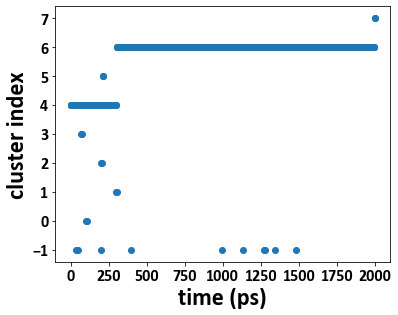

3


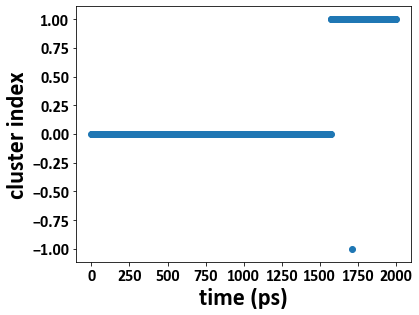

6


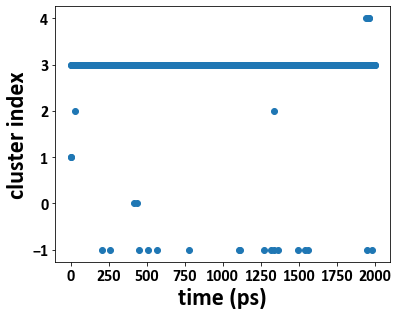

3


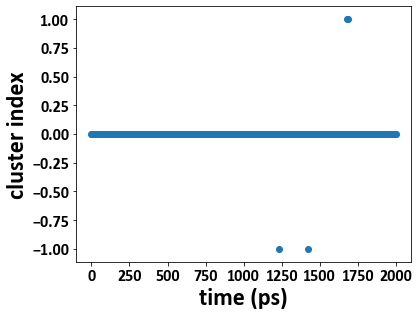

2


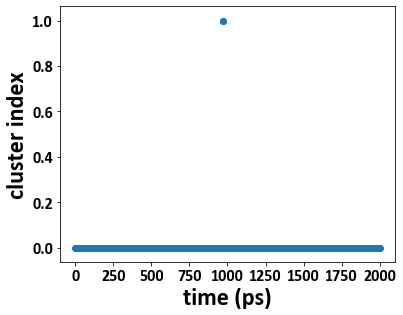

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
font_path = '/home/dongdong/tigress/calibribold.ttf'
font_prop = font_manager.FontProperties(fname=font_path, size=24)
leg_prop = font_manager.FontProperties(fname=font_path, size=17)
#for ii in [2,5,11,16,20]:
for ii in [2,5,11,16,20]:
    data=np.loadtxt('/home/dongdong/SCR/trpcage/iter.000080/00.enhcMD/%03d-t/plm.out' %ii)
    newdata=np.hstack((np.sin(data[:,1:]),np.cos(data[:,1:])))
    clusterer = hdbscan.HDBSCAN(min_cluster_size=2,min_samples=1)
    clusterer.fit(newdata)
    print(len(set(clusterer.labels_)))
    #print(cls_sel)
    fig, ax = plt.subplots(figsize=(6,4.7))
    ax.scatter(np.array(range(len(clusterer.labels_)))*2,clusterer.labels_)
    ax.set_ylabel(r'cluster index',fontproperties=font_prop)
    ax.set_xlabel(r'time (ps)',fontproperties=font_prop)
    #plt.ylim(0,2)
    #plt.xlim(25,55)
    #ax.set_yticks(np.linspace(0,2,5))
    #ax.set_yticklabels([0,0.5,1,2])
    #leg=plt.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
    #leg.get_frame().set_linewidth(0.0)
    #leg.get_frame().set_alpha(0.1)
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontproperties(font_prop)
        label.set_fontsize(16)
    plt.show()

2002
2


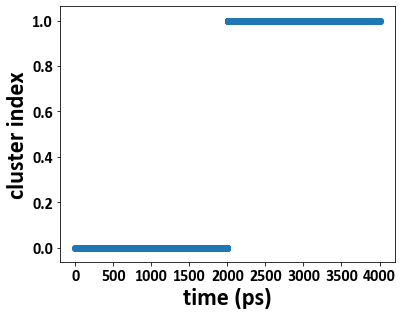

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
font_path = '/home/dongdong/tigress/calibribold.ttf'
font_prop = font_manager.FontProperties(fname=font_path, size=24)
leg_prop = font_manager.FontProperties(fname=font_path, size=17)
#for ii in [2,5,11,16,20]:


data1=np.loadtxt('/home/dongdong/SCR/trpcage/iter.000080/00.enhcMD/016-t/plm.out')
newdata1=np.hstack((np.sin(data1[:,1:]),np.cos(data1[:,1:])))
data2=np.loadtxt('/home/dongdong/SCR/trpcage/iter.000080/00.enhcMD/002-t/plm.out')
newdata2=np.hstack((np.sin(data2[:,1:]),np.cos(data2[:,1:])))
all_newdata=np.vstack((newdata1,newdata2))
print(len(all_newdata))

clusterer = hdbscan.HDBSCAN(min_cluster_size=2,min_samples=1)
clusterer.fit(all_newdata)
print(len(set(clusterer.labels_)))
#print(cls_sel)
fig, ax = plt.subplots(figsize=(6,4.7))
ax.scatter(np.array(range(len(clusterer.labels_)))*2,clusterer.labels_)
ax.set_ylabel(r'cluster index',fontproperties=font_prop)
ax.set_xlabel(r'time (ps)',fontproperties=font_prop)
#plt.ylim(0,2)
#plt.xlim(25,55)
#ax.set_yticks(np.linspace(0,2,5))
#ax.set_yticklabels([0,0.5,1,2])
#leg=plt.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
#leg.get_frame().set_linewidth(0.0)
#leg.get_frame().set_alpha(0.1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontproperties(font_prop)
    label.set_fontsize(16)
plt.show()

In [33]:
for wa in range(23,24):
    #print(wa)
    temp_cl=[]
    for it in range(1):
        filename='/home/dongdong/SCR/trpcage.run05/iter.%06d/00.enhcMD/%03d/sel.angle.out' %(it,wa)
        data=np.loadtxt(filename)
        print(np.sin(data)[0])
        print(np.cos(data)[0])
        print(np.hstack((np.sin(data),np.cos(data)))[0])
        print(len(np.hstack((np.sin(data),np.cos(data)))[0]))
        dist=mk_dist(data)
        clusterer = hdbscan.HDBSCAN(metric='precomputed',min_cluster_size=2)
        clusterer.fit(dist)
        print(len(set(clusterer.labels_)))

[ 0.74285209 -0.98926771  0.5206573  -0.88273994 -0.58798625 -0.8473431
 -0.44625486 -0.88520461  0.30736048 -0.72331471  0.86122628 -0.98883892
  0.78186459 -0.96979428 -0.25718879 -0.71544977  0.06534706  0.99531241
  0.43123848 -0.11816492 -0.2524744  -0.97844189  0.87971904 -0.9509489
  0.64094261  0.84362975  0.18336854  0.90097391  0.21726631 -0.69412092
  0.6022748  -0.81071126  0.54782204 -0.81650257  0.79053167 -0.85921739
  0.46178508 -0.99769681]
[-0.66945558  0.14611436 -0.85376576  0.4698619   0.80887092  0.53104582
  0.89490592 -0.46520189  0.95159315 -0.69051852 -0.50822169  0.14898855
  0.62344829  0.24392429  0.96636118 -0.69866417 -0.9978626   0.09671193
  0.90223798 -0.99299398 -0.96760357  0.20652233  0.47549386  0.309348
 -0.7675888   0.53692536  0.98304424  0.43387327  0.97611237  0.71985842
 -0.79828883  0.5854462  -0.83659489  0.57734179 -0.61242116  0.51161067
 -0.88699185  0.0678312 ]
[ 0.74285209 -0.98926771  0.5206573  -0.88273994 -0.58798625 -0.8473431
 -0.

In [69]:
all_cl=[]
for wa in range(30):
    #print(wa)
    temp_cl=[]
    for it in range(32):
        filename='/home/dongdong/SCR/trpcage.run05/iter.%06d/00.enhcMD/%03d/plm.out' %(it,wa)
        data=np.loadtxt(filename)[:,1:]
        newdata=np.hstack((np.sin(data),np.cos(data)))
        clusterer = hdbscan.HDBSCAN(min_cluster_size=2,min_samples=1)
        clusterer.fit(newdata)
        temp_cl.append(len(set(clusterer.labels_)))
    np.savetxt('/home/dongdong/SCR/trpcage.run05/w%d_cluHDBSCANp.dat' %wa, temp_cl)

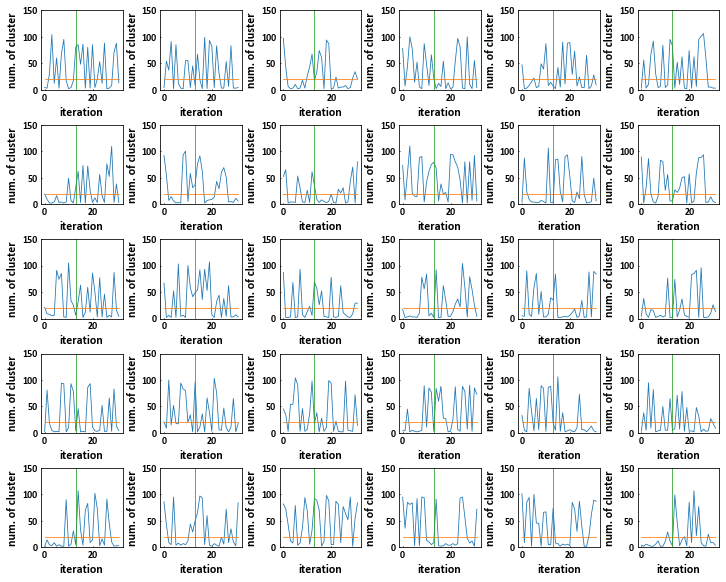

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
font_path = '/home/dongdong/tigress/calibribold.ttf'
font_prop = font_manager.FontProperties(fname=font_path, size=12)
leg_prop = font_manager.FontProperties(fname=font_path, size=10)
num_walkers=30
fig = plt.figure(figsize=(10,8))
for en in range(num_walkers):
    allcl=np.loadtxt('/home/dongdong/SCR/trpcage.run05/w%d_cluHDBSCANp.dat' %en)
    #print(np.array(range(len(allrmsd))))
    #print(allrmsd)
    sub = fig.add_subplot(int(num_walkers)/6,6,en+1)
    sub.plot(range(len(allcl)),allcl,lw=0.8)
    sub.plot(range(len(allcl)),[20]*len(allcl),lw=0.8)
    sub.plot([13]*2,[0,150],lw=0.8)
    sub.set_ylabel(r'num. of cluster',fontproperties=font_prop)
    sub.set_xlabel(r'iteration',fontproperties=font_prop)
    sub.tick_params(direction="in", length=1)
    plt.ylim(0,150)
    #plt.xlim(25,55)
    #ax.set_yticks(np.linspace(0,2,5))
    #ax.set_yticklabels([0,0.5,1,2])
    #leg=plt.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
    #leg.get_frame().set_linewidth(0.0)
    #leg.get_frame().set_alpha(0.1)
    for label in (sub.get_xticklabels() + sub.get_yticklabels()):
        label.set_fontproperties(font_prop)
        label.set_fontsize(10)
    #plt.savefig('plm.png',dpi=300,bbox_inches='tight')
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=0.4)
plt.show()